<a href="https://colab.research.google.com/github/Henryk33/Challenge-Telecom-X/blob/main/Proyecto_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Analisis de Datos de Telecom X**

## **Importanto las Bibliotecas para el proyecto y la base de datos.**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [70]:
Churn = '/content/TelecomX_Data.json'

In [71]:
df = pd.read_json(Churn)

In [72]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## **Manipulación de la base de datos**

In [74]:
dict_cols = ['customer', 'phone', 'account', 'internet']

for col in dict_cols:
    expanded = pd.json_normalize(df[col])
    df = pd.concat([df.drop(col, axis=1), expanded], axis=1)

In [75]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,65.6,593.3,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,59.9,542.4,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,73.9,280.85,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,98.0,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,83.9,267.4,Fiber optic,No,No,No,Yes,Yes,No


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [77]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [78]:
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
Contract,0


In [79]:
df['ChargesTotal'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.drop(columns=['Charges.Total'], inplace=True)

df['ChargesMonthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df.drop(columns=['Charges.Monthly'], inplace=True)

In [80]:
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
5827,7971-HLVXI,No,Male,0,Yes,Yes,72,Yes,Yes,Two year,...,Credit card (automatic),Fiber optic,No,No,No,No,No,Yes,6130.85,84.50
128,0218-QNVAS,No,Male,0,Yes,Yes,71,Yes,Yes,One year,...,Bank transfer (automatic),Fiber optic,No,Yes,No,No,Yes,Yes,7113.75,100.55
2442,3410-MHHUM,No,Female,0,Yes,Yes,44,Yes,Yes,One year,...,Electronic check,Fiber optic,No,Yes,Yes,No,No,Yes,4295.35,94.40
4734,6483-OATDN,No,Male,0,Yes,Yes,8,Yes,No,Month-to-month,...,Credit card (automatic),DSL,Yes,No,No,No,No,No,411.60,51.30
2033,2868-LLSKM,No,Female,0,Yes,Yes,68,Yes,Yes,One year,...,Bank transfer (automatic),Fiber optic,No,Yes,No,Yes,No,No,5733.40,83.65


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Contract          7267 non-null   object 
 10  PaperlessBilling  7267 non-null   object 
 11  PaymentMethod     7267 non-null   object 
 12  InternetService   7267 non-null   object 
 13  OnlineSecurity    7267 non-null   object 
 14  OnlineBackup      7267 non-null   object 
 15  DeviceProtection  7267 non-null   object 
 16  TechSupport       7267 non-null   object 


In [82]:
df.rename(columns={'customerID': 'ID',
                   'gender': 'Gender',
                   'tenure': 'Tenure',
}, inplace=True)

In [83]:
df.head()

,ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,DSL,No,Yes,No,Yes,Yes,No,593.30,65.6
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,DSL,No,No,No,No,No,Yes,542.40,59.9
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.9
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.9


In [84]:
#Valores de Permanencia 'Yes' / 'No' reemplazando valores no compatibles con 'N/A'

df['Churn'] = df['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'N/A')
df

df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1

,Total
Churn,
N/A,224
No,5174
Yes,1869


### **Grafica de Permanencia**

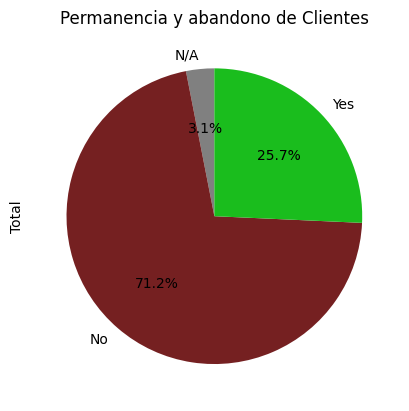

In [85]:
df1['Total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = ['Gray', '#752021', '#1abd1d'])
plt.title('Permanencia y abandono de Clientes')

plt.show()

### Podemos notar la tasa de abandono de clientes es de un 25.7% siendo un minimo en comparasión.

## **Evasión por variables categórica**

In [86]:
cliente_evade = df.query('Churn == "Yes"')
cliente_evade

,ID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,No,Yes,No,No,No,280.85,73.90
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,Fiber optic,No,Yes,Yes,No,Yes,Yes,1237.85,98.00
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,Yes,Yes,No,267.40,83.90
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,One year,...,Credit card (automatic),DSL,Yes,No,Yes,No,No,Yes,2791.50,62.70
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,Month-to-month,...,Electronic check,DSL,No,No,No,No,No,No,25.10,25.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,No,No,21,Yes,No,Month-to-month,...,Bank transfer (automatic),Fiber optic,No,No,Yes,No,Yes,Yes,2030.30,96.80
7246,9965-YOKZB,Yes,Male,1,No,No,9,Yes,Yes,Month-to-month,...,Electronic check,Fiber optic,No,No,No,No,No,Yes,790.15,83.85
7260,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Month-to-month,...,Mailed check,Fiber optic,No,No,No,No,No,No,70.15,70.15
7261,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,Month-to-month,...,Bank transfer (automatic),No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,85.50,20.95


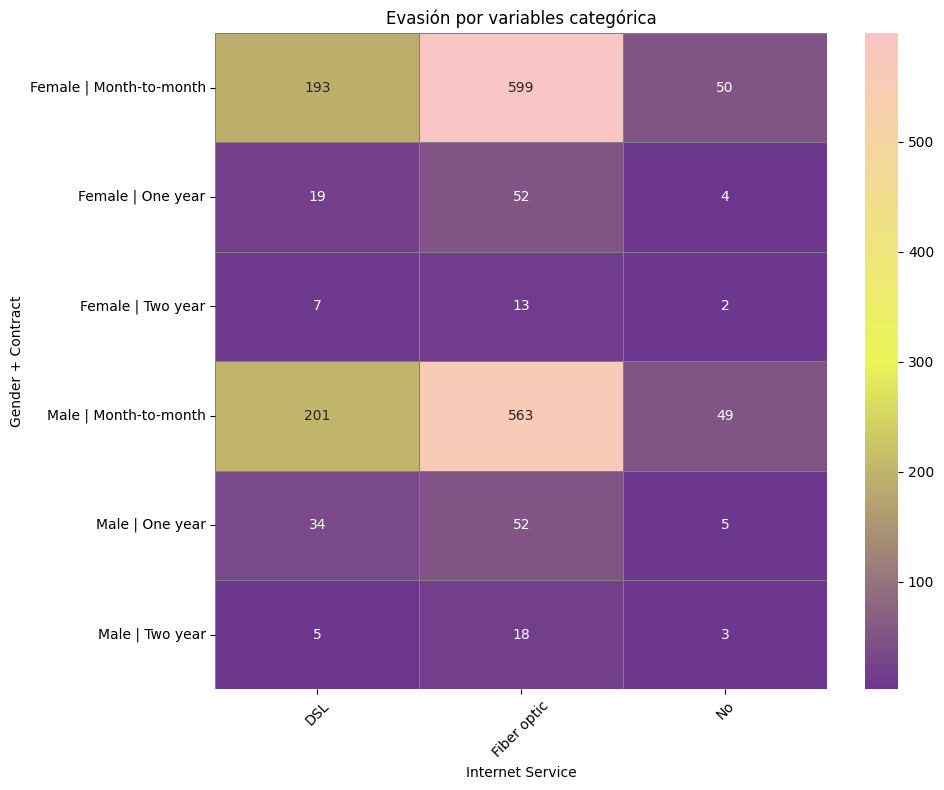

In [87]:
from matplotlib.colors import LinearSegmentedColormap
cliente_evade[['Gender','InternetService','Contract']].value_counts()
cliente_evade = cliente_evade.copy()

cliente_evade['Gender_Contract'] = cliente_evade['Gender'] + " | " + cliente_evade['Contract']

heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack()

colors = LinearSegmentedColormap.from_list("colors", ["#6d368f", "#eaf558", "#fac5c5"])

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=colors, linewidths=0.5, linecolor='gray')

plt.title('Evasión por variables categórica')
plt.xlabel('Internet Service')
plt.ylabel('Gender + Contract')
plt.xticks(rotation=45)
plt.tight_layout()

Esta gráfica nos muestra en qué segmentos específicos de nuestros clientes está concentrado el mayor número de abandonos. los contratos de tipo mes a mes combinados con servicios de internet de fibra óptica tienen los valores más altos de evasión. Estos clientes tienden a ser más sensibles a problemas de precio o servicio. En cambio, los contratos de largo plazo (One year y Two year), sin importar el género o el tipo de internet, tienen muchos menos casos de abandono.

In [88]:
Variables_numericas = [ 'Churn', 'ChargesMonthly', 'Tenure']

df_evasion_num = df[Variables_numericas].sort_values('Churn').set_index('Churn')
df_evasion_num

,ChargesMonthly,Tenure
Churn,,
N/A,20.65,7
N/A,60.15,51
N/A,106.30,41
N/A,70.30,1
N/A,103.30,19
...,...,...
Yes,82.05,48
Yes,69.85,1
Yes,69.55,1


## **Evasión por variable Numérica**

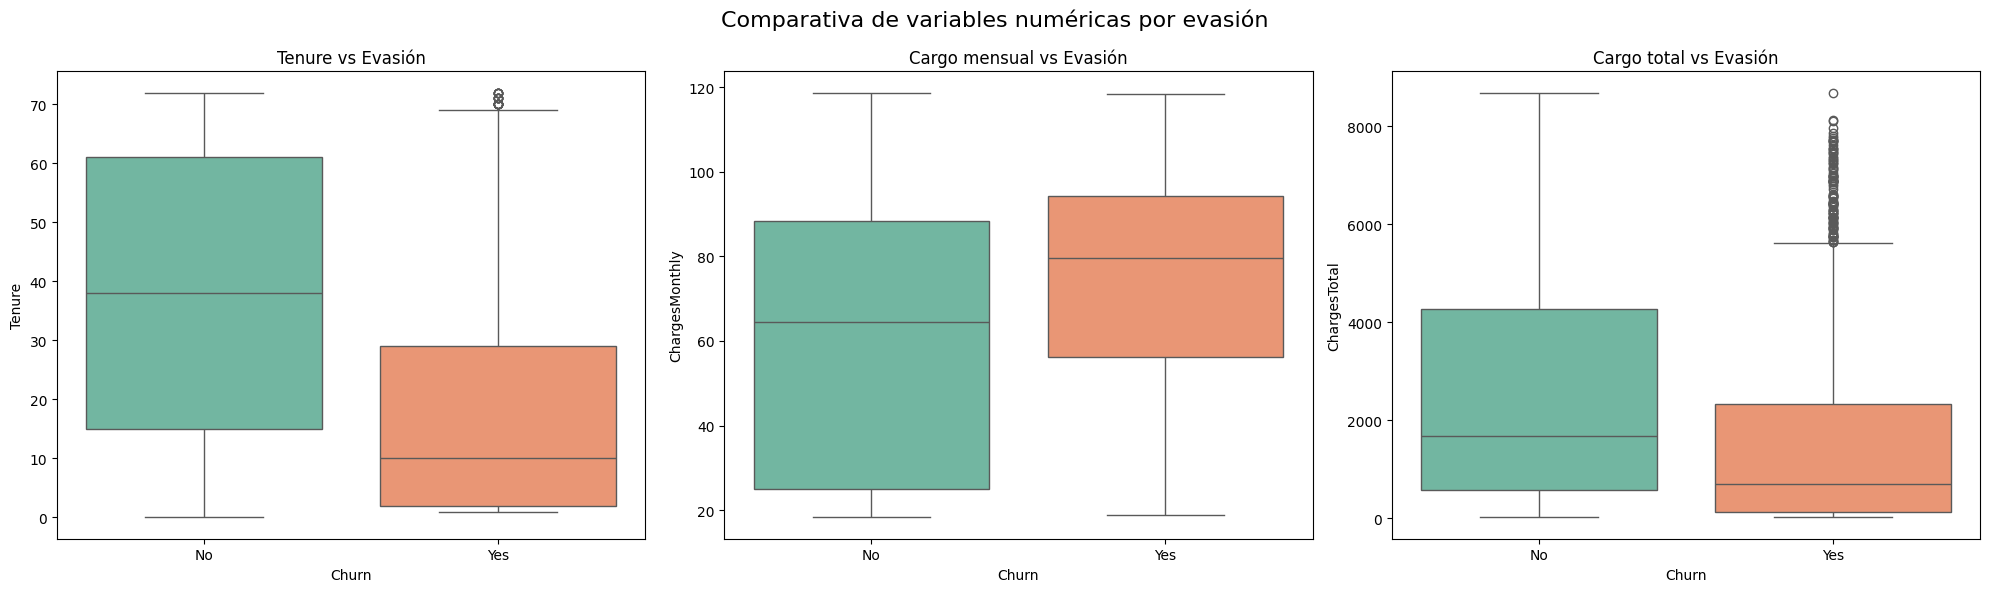

In [89]:
df_churn = df[df['Churn'].isin(['Yes', 'No'])]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(ax=axes[0], data=df_churn, x='Churn', y='Tenure', hue='Churn', palette='Set2', legend=False)
axes[0].set_title('Tenure vs Evasión')

sns.boxplot(ax=axes[1], data=df_churn, x='Churn', y='ChargesMonthly', hue='Churn', palette='Set2', legend=False)
axes[1].set_title('Cargo mensual vs Evasión')

sns.boxplot(ax=axes[2], data=df_churn, x='Churn', y='ChargesTotal', hue='Churn', palette='Set2', legend=False)
axes[2].set_title('Cargo total vs Evasión')

plt.suptitle('Comparativa de variables numéricas por evasión', fontsize=16)
plt.tight_layout()
plt.show()

El riesgo de evasión es mayor en los primeros meses, los clientes sensibles al precio podrían abandonar si no perciben suficiente valor por lo que pagan.